In [1]:
# !pip install xgboost

In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from scipy.stats import randint
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

## Dataset Exploration

In [3]:
data=pd.read_csv("train.csv", sep=",",encoding="UTF-8")

In [4]:
print(data.shape)
data.head(20)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
statistics = data['SalePrice'].describe()
statistics

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Missing Values

#### Cheking Missing Values

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values:\n", missing_values)

Missing Values:
 LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [8]:
data['Alley'].fillna('None', inplace=True)
data['MasVnrType'].fillna('None', inplace=True)
data['FireplaceQu'].fillna('None', inplace=True)
data['PoolQC'].fillna('None', inplace=True)
data['Fence'].fillna('None', inplace=True)
data['MiscFeature'].fillna('None', inplace=True)
data['BsmtQual'].fillna('None', inplace=True)
data['BsmtCond'].fillna('None', inplace=True)
data['BsmtExposure'].fillna('None', inplace=True)
data['BsmtFinType1'].fillna('None', inplace=True)
data['BsmtFinType2'].fillna('None', inplace=True)
data['GarageType'].fillna('None', inplace=True)
data['GarageFinish'].fillna('None', inplace=True)
data['GarageQual'].fillna('None', inplace=True)
data['GarageCond'].fillna('None', inplace=True)

In [9]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values:\n", missing_values)

Missing Values:
 LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64


## Missing values imputation 

In [10]:
# Fill numerical variabls gaps

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors

# Apply KNN imputation to numerical columns
data[numerical_cols] = knn_imputer.fit_transform(data[numerical_cols])  

In [11]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Function to fill missing values while preserving original distribution
def random_categorical_impute(col):
    if col.isnull().sum() > 0:  # Only apply if there are missing values
        values, counts = np.unique(col.dropna(), return_counts=True)  # Get unique values & counts
        probabilities = counts / counts.sum()  # Compute probabilities
        missing_indices = col[col.isnull()].index  # Get missing indices
        data.loc[missing_indices, col.name] = np.random.choice(values, size=len(missing_indices), p=probabilities)

# Apply function to each categorical column
data[categorical_cols].apply(random_categorical_impute)

# Verify missing values are handled
print(data.isnull().sum().sum())  # Should print 0 if all missing values are filled

0


## Preprocessing for Linear models

## Correlation on numerical variables

In [12]:
df_numerical = data.select_dtypes(include=['number'])
df_numerical = df_numerical.drop(columns=['MSSubClass', 'OverallQual', 'OverallCond'])

In [13]:
df_numerical.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


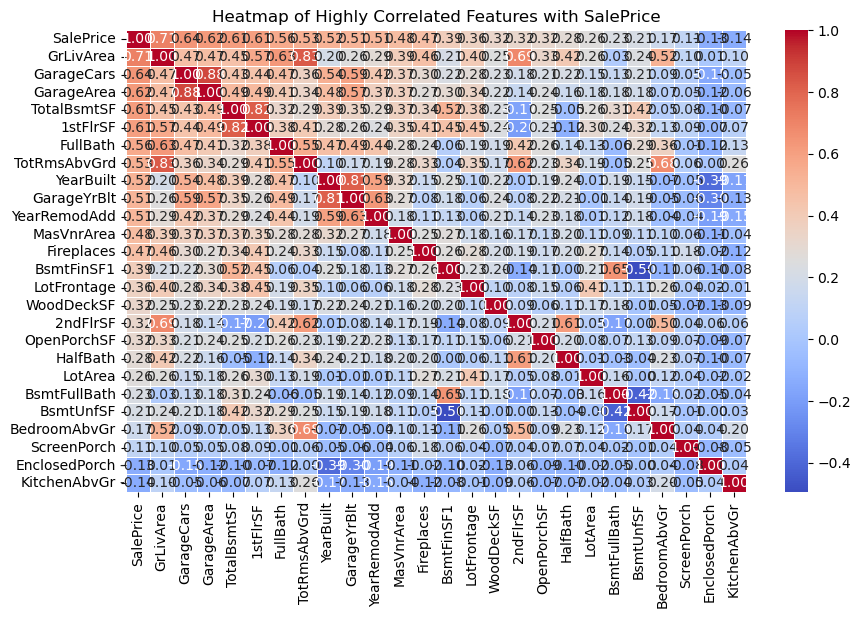

               SalePrice
SalePrice       1.000000
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
GarageYrBlt     0.512455
YearRemodAdd    0.507101
MasVnrArea      0.479310
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.357165
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907


In [14]:
# Compute correlation matrix
correlation_matrix = df_numerical.corr()

# Extract correlations with SalePrice
saleprice_correlation = correlation_matrix["SalePrice"].sort_values(ascending=False)

# Select highly correlated features (absolute correlation > 0.1 for significance)
high_corr_features = saleprice_correlation[abs(saleprice_correlation) > 0.1]

# Selected_features as list
selected_features = list(high_corr_features.index)

# Plot correlation heatmap for highly correlated features
plt.figure(figsize=(10, 6))
sns.heatmap(df_numerical[selected_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Highly Correlated Features with SalePrice")
plt.show()

# Convert to DataFrame and display
high_corr_features_data = high_corr_features.to_frame()
print(high_corr_features_data)

In [15]:
#We removed 9 variables
high_corr_features_data.shape

(26, 1)

In [16]:
df_numerical

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,62.0,7917.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,85.0,13175.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,66.0,9042.0,1941.0,2006.0,0.0,275.0,0.0,877.0,1152.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,68.0,9717.0,1950.0,1996.0,0.0,49.0,1029.0,0.0,1078.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [17]:
df_numerical_final = df_numerical.drop(columns=['Id'])

In [18]:
df_numerical_final.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [19]:
# Compute correlation matrix
correlation_matrix = df_numerical_final.corr().abs()  # Get absolute correlation values

# Create an upper triangle matrix to avoid duplicate correlations
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find pairs of highly correlated features (threshold > 0.8, can be adjusted)
high_correlation_pairs = [(col, upper_triangle[col].idxmax()) for col in upper_triangle.columns if any(upper_triangle[col] > 0.8)]

for feature1, feature2 in high_correlation_pairs:
    print(f"({feature1}, {feature2})")

(1stFlrSF, TotalBsmtSF)
(TotRmsAbvGrd, GrLivArea)
(GarageYrBlt, YearBuilt)
(GarageArea, GarageCars)


In [20]:
# # Identify features to remove (keeping only one from each correlated pair)
# features_to_remove = ["GarageCars", "TotalBsmtSF", "TotRmsAbvGrd", "GarageYrBlt"]

# # Drop the highly correlated features
# df_numerical_final = df_numerical_final.drop(columns=features_to_remove)

# # Print final list of removed features
# print("\nFinal List of Removed Features:", features_to_remove)

In [21]:
df_numerical_final.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [22]:
categorical_features = list(data.select_dtypes(include=['object']).columns) + ['MSSubClass', 'OverallQual', 'OverallCond']

# Get the columns from both filtered tables
filtered_columns = list(set(df_numerical_final.columns) | set(categorical_features))  # Union of both column sets

# Ensure we only keep columns that exist in the original data
final_columns = [col for col in filtered_columns if col in data.columns]

# Create the final dataset with selected columns
data_work = data[final_columns]

cols = ['SalePrice'] + [col for col in data_work.columns if col != 'SalePrice']
data_work = data_work[cols]

In [23]:
columns = data_work.columns.tolist()
columns

['SalePrice',
 'Alley',
 'YrSold',
 'PoolQC',
 'MSZoning',
 'GarageYrBlt',
 'GarageQual',
 'Functional',
 'BsmtFinType2',
 'BldgType',
 'OverallCond',
 '3SsnPorch',
 'Street',
 'Exterior2nd',
 'GrLivArea',
 'HalfBath',
 'TotRmsAbvGrd',
 'BsmtUnfSF',
 'RoofMatl',
 'ScreenPorch',
 'BsmtFinSF1',
 'MSSubClass',
 'FireplaceQu',
 'Fence',
 'GarageCond',
 '2ndFlrSF',
 'HeatingQC',
 'YearRemodAdd',
 'GarageArea',
 'Foundation',
 'BsmtExposure',
 'BedroomAbvGr',
 'Condition1',
 '1stFlrSF',
 'BsmtFullBath',
 'Heating',
 'MasVnrArea',
 'BsmtFinSF2',
 'GarageType',
 'MiscVal',
 'EnclosedPorch',
 'Condition2',
 'PoolArea',
 'CentralAir',
 'KitchenAbvGr',
 'ExterCond',
 'MiscFeature',
 'BsmtQual',
 'KitchenQual',
 'LandSlope',
 'TotalBsmtSF',
 'LowQualFinSF',
 'MoSold',
 'LotFrontage',
 'PavedDrive',
 'SaleCondition',
 'HouseStyle',
 'Neighborhood',
 'Utilities',
 'Electrical',
 'LotArea',
 'OverallQual',
 'GarageCars',
 'ExterQual',
 'BsmtCond',
 'RoofStyle',
 'OpenPorchSF',
 'LandContour',
 'LotCo

### Distributions

In [24]:
data_work.head()

,SalePrice,Alley,YrSold,PoolQC,MSZoning,GarageYrBlt,GarageQual,Functional,BsmtFinType2,BldgType,...,WoodDeckSF,Exterior1st,Fireplaces,GarageFinish,BsmtFinType1,MasVnrType,FullBath,SaleType,LotShape,YearBuilt
0,208500.0,None,2008.0,None,RL,2003.0,TA,Typ,Unf,1Fam,...,0.0,VinylSd,0.0,RFn,GLQ,BrkFace,2.0,WD,Reg,2003.0
1,181500.0,None,2007.0,None,RL,1976.0,TA,Typ,Unf,1Fam,...,298.0,MetalSd,1.0,RFn,ALQ,None,2.0,WD,Reg,1976.0
2,223500.0,None,2008.0,None,RL,2001.0,TA,Typ,Unf,1Fam,...,0.0,VinylSd,1.0,RFn,GLQ,BrkFace,2.0,WD,IR1,2001.0
3,140000.0,None,2006.0,None,RL,1998.0,TA,Typ,Unf,1Fam,...,0.0,Wd Sdng,1.0,Unf,ALQ,None,1.0,WD,IR1,1915.0
4,250000.0,None,2008.0,None,RL,2000.0,TA,Typ,Unf,1Fam,...,192.0,VinylSd,1.0,RFn,GLQ,BrkFace,2.0,WD,IR1,2000.0


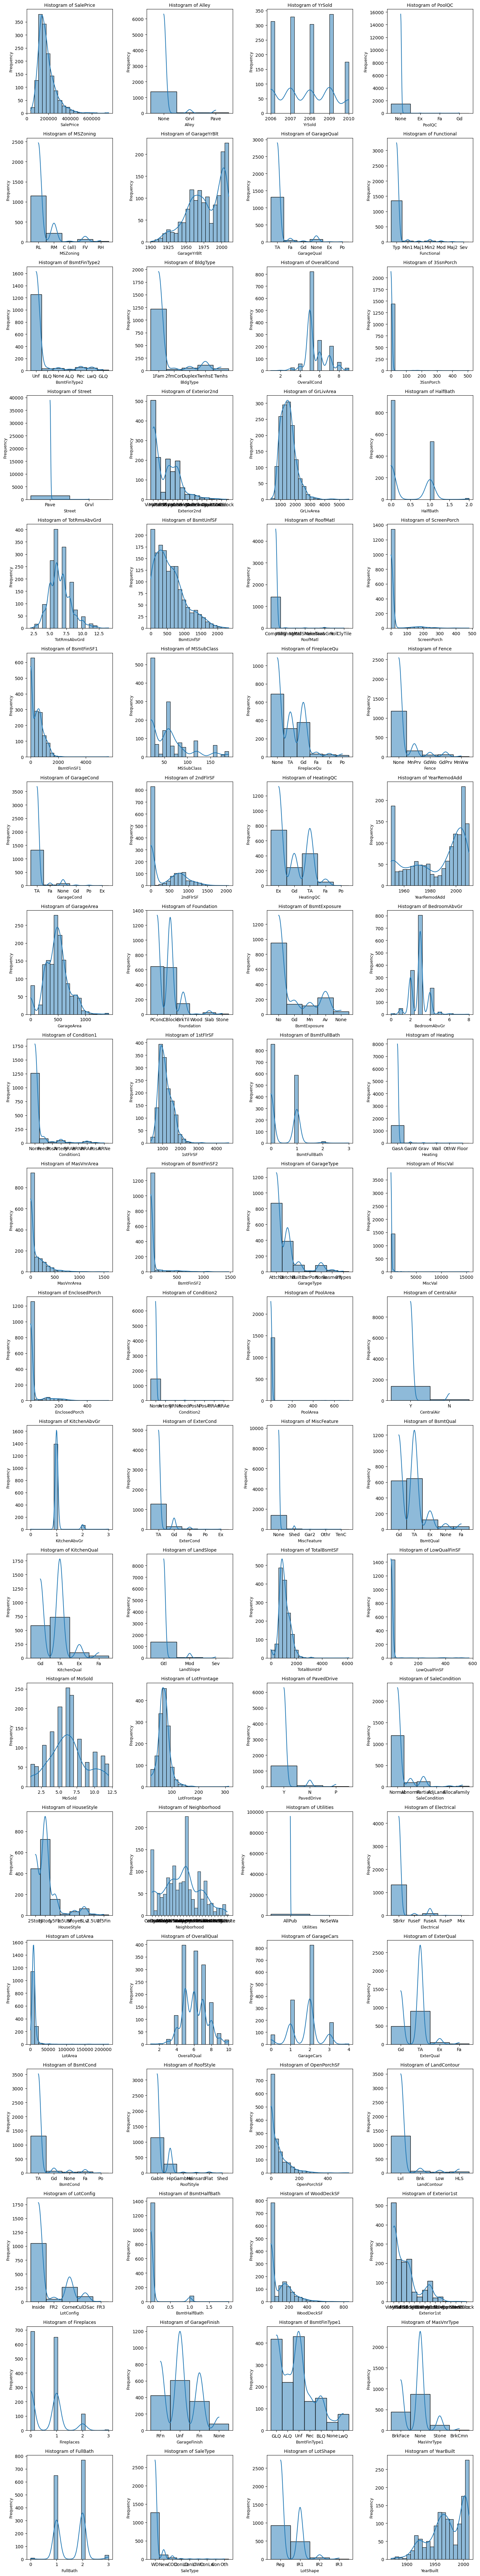

In [25]:
import math

num_columns = len(data_work.columns)

cols = 4
rows = math.ceil(num_columns / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, column in enumerate(data_work.columns):
    sns.histplot(data=data_work, x=column, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=9)
    axes[i].set_ylabel("Frequency", fontsize=9)

for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

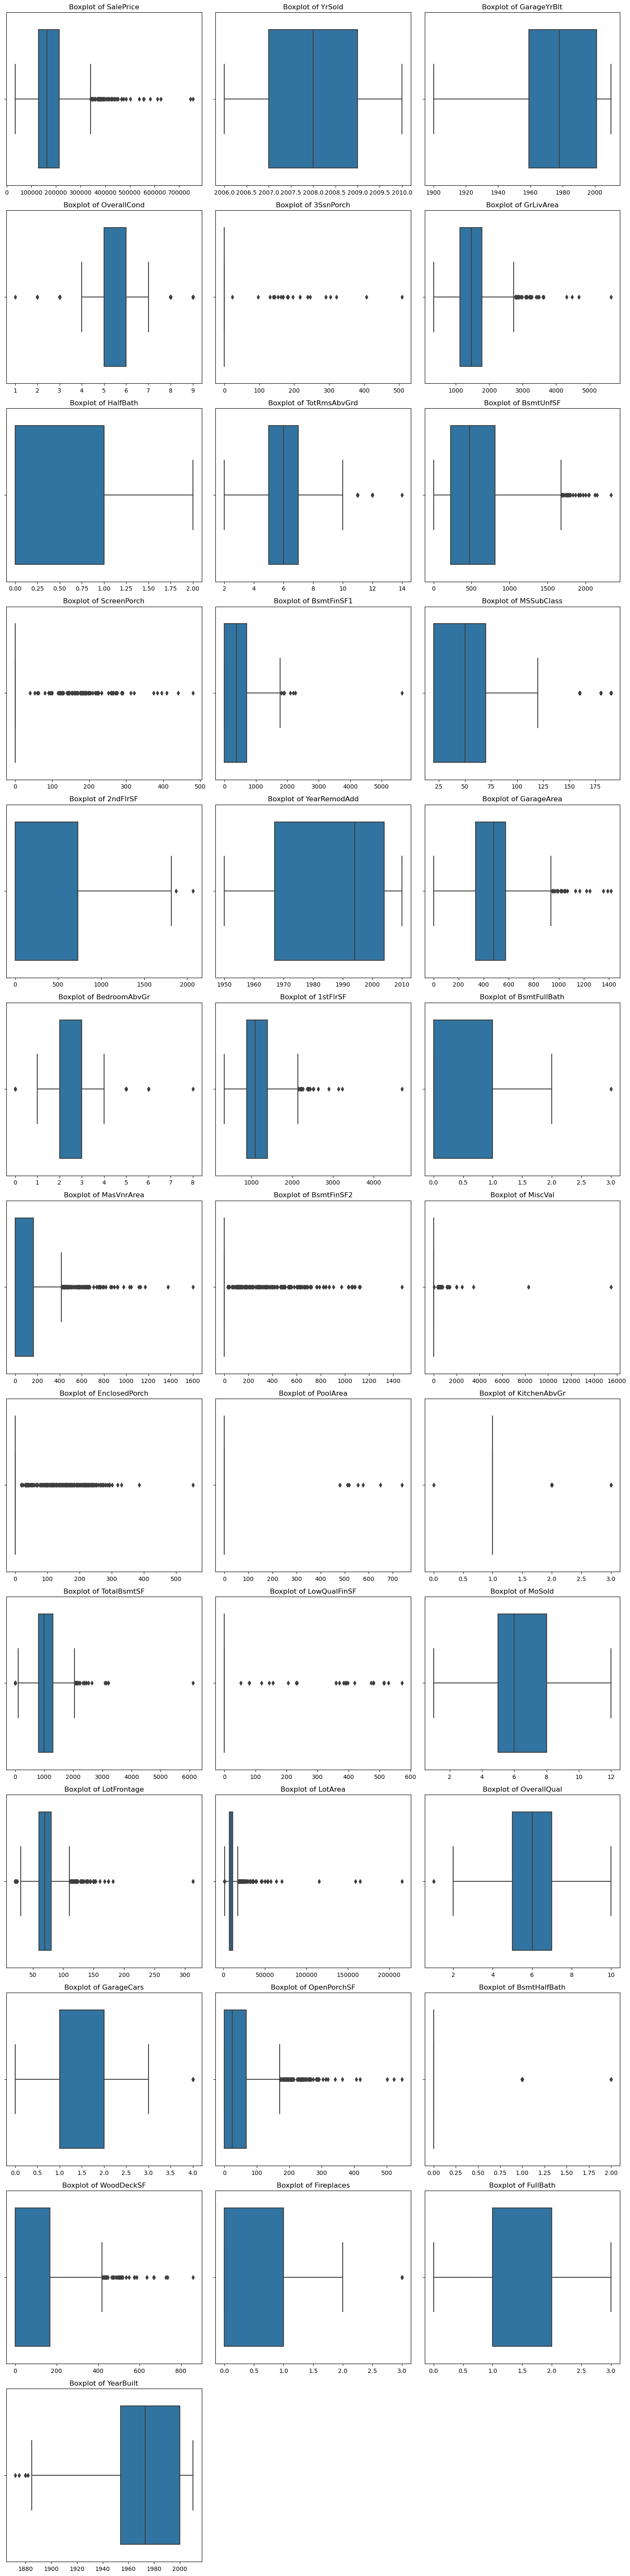

In [26]:
# Function to plot boxplots for numerical variables
def plot_boxplots(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Plot boxplots for each numerical column
    plt.figure(figsize=(15, 5 * len(numerical_cols) // 3))  # Adjust figure size
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot((len(numerical_cols) // 3) + 1, 3, i)  # Arrange in grid layout
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.xlabel("")  # Remove x-axis label for better visualization
        plt.tight_layout()

    plt.show()

# Call function to plot boxplots
plot_boxplots(data_work)

In [27]:
data_dim_before = data_work.shape[0]

In [28]:
data_work = data_work.drop(data_work[(data_work['GrLivArea'] > 4000)
                                  & (data_work['SalePrice'] < 200000)].index)
data_work = data_work.drop(data_work[(data_work['GarageArea'] > 1200)
                                  & (data_work['SalePrice'] < 300000)].index)
data_work = data_work.drop(data_work[(data_work['TotalBsmtSF'] > 4000)
                                  & (data_work['SalePrice'] < 200000)].index)
data_work = data_work.drop(data_work[(data_work['1stFlrSF'] > 4000)
                                  & (data_work['SalePrice'] < 200000)].index)
data_work = data_work.drop(data_work[(data_work['TotRmsAbvGrd'] > 12)
                                  & (data_work['SalePrice'] < 230000)].index)
data_work = data_work.drop(data_work[(data_work['OverallQual'] > 9)
                                  & (data_work['SalePrice'] < 220000)].index)

In [29]:
data_dim_after = data_work.shape[0]

In [30]:
num_outliers = data_dim_before - data_dim_after
num_outliers

6

### Encoding of Categorical Variables

In [31]:
### Not encoded: 'OverallQual', 'OverallCond'

In [32]:
encoding = [ 'LotShape', 'Utilities', 'LandSlope', 'ExterCond','ExterQual','BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC']

In [33]:
len(encoding)

19

In [34]:
#Variables
variables_1=['Street','CentralAir']

# Apply LabelEncoder to each categorical column (if needed)
for col in variables_1:
    le = LabelEncoder()
    data_work[col] = le.fit_transform(data_work[col])

In [35]:
# Define the ordering for (LotShape)
ordinal_encoding_1 = OrdinalEncoder(categories=[['Reg', 'IR1', 'IR2', 'IR3']])

# Apply OrdinalEncoder
data_work['LotShape'] = ordinal_encoding_1.fit_transform(data_work[['LotShape']])

In [36]:
# Define the ordering for (Utilities)
ordinal_encoding_2 = OrdinalEncoder(categories=[['ELO', 'NoSeWa', 'NoSewr', 'AllPub']])

# Apply OrdinalEncoder
data_work['Utilities'] = ordinal_encoding_2.fit_transform(data_work[['Utilities']])

In [37]:
# Define the ordering for (LandSlope)
ordinal_encoding_3 = OrdinalEncoder(categories=[['Gtl', 'Mod', 'Sev']])

# Apply OrdinalEncoder
data_work['LandSlope'] = ordinal_encoding_3.fit_transform(data_work[['LandSlope']])

In [38]:
# Define the ordering for (ExterQual, ExterCond, HeatingQC, KitchenQual)
ordinal_encoding_4 = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])

# Apply OrdinalEncoder to 'ExterQual'
data_work['ExterQual'] = ordinal_encoding_4.fit_transform(data_work[['ExterQual']])

# Apply OrdinalEncoder to 'ExterCond'
data_work['ExterCond'] = ordinal_encoding_4.fit_transform(data_work[['ExterCond']])

# Apply OrdinalEncoder to 'HeatingQC'
data_work['HeatingQC'] = ordinal_encoding_4.fit_transform(data_work[['HeatingQC']])

# Apply OrdinalEncoder to 'KitchenQual'
data_work['KitchenQual'] = ordinal_encoding_4.fit_transform(data_work[['KitchenQual']])

In [39]:
# Define the ordering for (BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond)
ordinal_encoding_5 = OrdinalEncoder(categories=[['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])

# Apply OrdinalEncoder to 'BsmtQual'
data_work['BsmtQual'] = ordinal_encoding_5.fit_transform(data_work[['BsmtQual']])

# Apply OrdinalEncoder to 'BsmtCond'
data_work['BsmtCond'] = ordinal_encoding_5.fit_transform(data_work[['BsmtCond']])

# Apply OrdinalEncoder to 'FireplaceQu'
data_work['FireplaceQu'] = ordinal_encoding_5.fit_transform(data_work[['FireplaceQu']])

# Apply OrdinalEncoder to 'GarageQual'
data_work['GarageQual'] = ordinal_encoding_5.fit_transform(data_work[['GarageQual']])

# Apply OrdinalEncoder to 'GarageCond'
data_work['GarageCond'] = ordinal_encoding_5.fit_transform(data_work[['GarageCond']])

In [40]:
# Define the ordering for (BsmtFinType1, BsmtFinType2)
ordinal_encoding_6 = OrdinalEncoder(categories=[['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']])

# Apply OrdinalEncoder to 'BsmtFinType1'
data_work['BsmtFinType1'] = ordinal_encoding_6.fit_transform(data_work[['BsmtFinType1']])

# Apply OrdinalEncoder to 'BsmtFinType2'
data_work['BsmtFinType2'] = ordinal_encoding_6.fit_transform(data_work[['BsmtFinType2']])

In [41]:
# Define the ordering for (Functional)
ordinal_encoding_7 = OrdinalEncoder(categories=[['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']])

# Apply OrdinalEncoder
data_work['Functional'] = ordinal_encoding_7.fit_transform(data_work[['Functional']])

In [42]:
# Define the ordering for (GarageFinish)
ordinal_encoding_8 = OrdinalEncoder(categories=[['None', 'Unf', 'RFn', 'Fin']])

# Apply OrdinalEncoder
data_work['GarageFinish'] = ordinal_encoding_8.fit_transform(data_work[['GarageFinish']])

In [43]:
# Define the ordering for (PavedDrive)
ordinal_encoding_9 = OrdinalEncoder(categories=[['N', 'P', 'Y']])

# Apply OrdinalEncoder
data_work['PavedDrive'] = ordinal_encoding_9.fit_transform(data_work[['PavedDrive']])

In [44]:
# Define the ordering for (PoolQC)
ordinal_encoding_10 = OrdinalEncoder(categories=[['None', 'Fa', 'TA', 'Gd', 'Ex']])

# Apply OrdinalEncoder
data_work['PoolQC'] = ordinal_encoding_10.fit_transform(data_work[['PoolQC']])

In [45]:
# Define the ordering for (BsmtExposure)
ordinal_encoding_11 = OrdinalEncoder(categories=[['None', 'No', 'Mn', 'Av', 'Gd']])

# Apply OrdinalEncoder
data_work['BsmtExposure'] = ordinal_encoding_11.fit_transform(data_work[['BsmtExposure']])

In [46]:
OneHotEncoding = ['LandContour', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MSSubClass','MSZoning','Alley', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType',  'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [47]:
len(OneHotEncoding)

26

In [48]:
data_work = pd.get_dummies(data_work, columns=OneHotEncoding, drop_first=False)

In [49]:
categorical_columns = data_work.select_dtypes(include=['object']).columns.tolist()

print(f"Number of categorical variables: {len(categorical_columns)}")
print("Categorical Variables:", categorical_columns)


Number of categorical variables: 0
Categorical Variables: []


In [50]:
def categorical_variables(df):
    """
    Function to count the number of categorical variables in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        int: The number of categorical columns.
    """
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    return (categorical_columns)

In [51]:
categorical_columns = list(categorical_variables(data_work)) + ['MSSubClass', 'OverallQual', 'OverallCond']
num_categorical=len(categorical_columns)
print(f"Number of categorical variables: {num_categorical}")

Number of categorical variables: 3


In [52]:
variables_to_be_encoded=encoding+OneHotEncoding
missing=[col for col in categorical_columns if col not in variables_to_be_encoded]
print(missing)

['OverallQual', 'OverallCond']


In [53]:
num_columns = data_work.shape[1]
num_columns

269

In [54]:
duplicates = data_work.columns[data_work.columns.duplicated()].tolist()
print("Duplicate Columns:", duplicates)
len(duplicates)

Duplicate Columns: ['RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing']


28

In [55]:
data_work = data_work.loc[:, ~data_work.columns.duplicated()]
print("New shape after removing duplicate columns:", data_work.shape)

New shape after removing duplicate columns: (1454, 241)


In [56]:
data_work.head(10)

,SalePrice,YrSold,PoolQC,GarageYrBlt,GarageQual,Functional,BsmtFinType2,OverallCond,3SsnPorch,Street,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,2008.0,0.0,2003.0,3.0,7.0,1.0,5.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0
1,181500.0,2007.0,0.0,1976.0,3.0,7.0,1.0,8.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0
2,223500.0,2008.0,0.0,2001.0,3.0,7.0,1.0,5.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,140000.0,2006.0,0.0,1998.0,3.0,7.0,1.0,5.0,0.0,1,...,0,0,0,1,1,0,0,0,0,0
4,250000.0,2008.0,0.0,2000.0,3.0,7.0,1.0,5.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0
5,143000.0,2009.0,0.0,1993.0,3.0,7.0,1.0,5.0,320.0,1,...,0,0,0,1,0,0,0,0,1,0
6,307000.0,2007.0,0.0,2004.0,3.0,7.0,1.0,5.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0
7,200000.0,2009.0,0.0,1973.0,3.0,7.0,4.0,6.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0
8,129900.0,2008.0,0.0,1931.0,2.0,6.0,1.0,5.0,0.0,1,...,0,0,0,1,1,0,0,0,0,0
9,118000.0,2008.0,0.0,1939.0,4.0,7.0,1.0,6.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0


### SalePrice Skewness

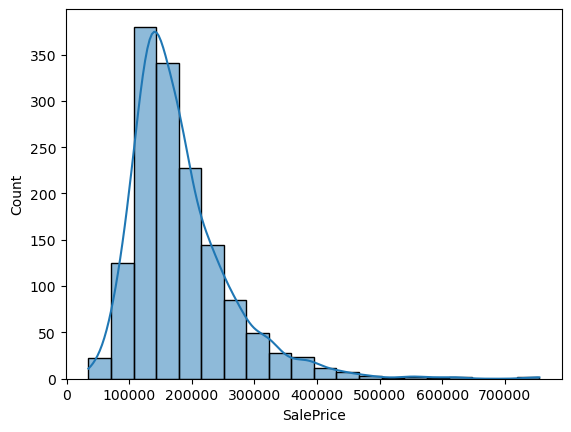

In [57]:
sns.histplot(data=data_work, x=data_work['SalePrice'], kde=True, bins=20)
plt.show()

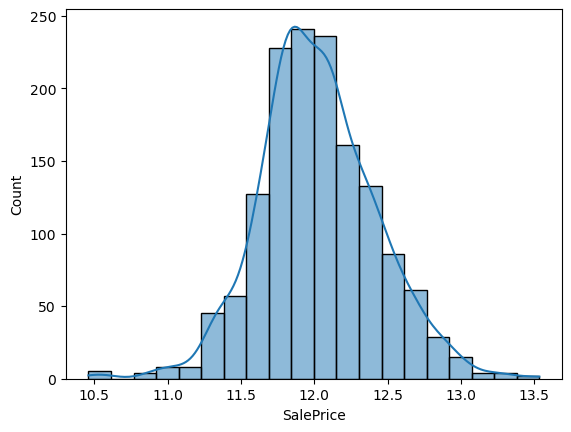

In [58]:
sns.histplot(data=data_work, x=np.log(data_work['SalePrice']), kde=True, bins=20)
plt.show()

In [59]:
data_work.head()

,SalePrice,YrSold,PoolQC,GarageYrBlt,GarageQual,Functional,BsmtFinType2,OverallCond,3SsnPorch,Street,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,2008.0,0.0,2003.0,3.0,7.0,1.0,5.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0
1,181500.0,2007.0,0.0,1976.0,3.0,7.0,1.0,8.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0
2,223500.0,2008.0,0.0,2001.0,3.0,7.0,1.0,5.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,140000.0,2006.0,0.0,1998.0,3.0,7.0,1.0,5.0,0.0,1,...,0,0,0,1,1,0,0,0,0,0
4,250000.0,2008.0,0.0,2000.0,3.0,7.0,1.0,5.0,0.0,1,...,0,0,0,1,0,0,0,0,1,0


## Train-Test Split

In [60]:
X = data_work.drop(columns=['SalePrice'])
y = data_work['SalePrice']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform Saleprice with log function
y_train_log = np.log(y_train)

## Linear Regression

In [61]:
# Identify features to remove (keeping only one from each correlated pair) 
multicol_features = ["GarageCars", "TotalBsmtSF", "TotRmsAbvGrd", "GarageYrBlt"]

low_corr_features = df_numerical_final.columns.difference(selected_features)
feature_to_remove = multicol_features + list(low_corr_features)

# Drop the highly correlated features and  for linear
X_train_lr = X_train.drop(columns=feature_to_remove)
X_test_lr = X_test.drop(columns=feature_to_remove)

print("\nFinal List of Removed Features:", feature_to_remove)


Final List of Removed Features: ['GarageCars', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF', 'MiscVal', 'MoSold', 'PoolArea', 'YrSold']


In [62]:
lr = LinearRegression()
lr.fit(X_train_lr, y_train_log)

y_pred = np.exp(lr.predict(X_test_lr))

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 13432.34
Mean Squared Error (MSE): 386968966.38
Root Mean Squared Error (RMSE): 19671.53
R² Score: 0.9379


## Lasso Regression

In [63]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Define and fit LassoCV model
alphas = np.logspace(-5, 2, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train_log)

# Best alpha
best_alpha = lasso_cv.alpha_
print(f"Optimal alpha: {best_alpha}")

# Fit the final Lasso model with the best alpha
lasso_best = LassoCV(alphas=[best_alpha], cv=5)
lasso_best.fit(X_train_scaled, y_train_log)

# Get the coefficients of features
coefficients = lasso_best.coef_

# best coef
# Optimal_alpha =  0.0004229242874389499

# # Identify selected features (non-zero coefficients)
# selected_features = X.columns[coefficients != 0]
# print("Selected Features:", selected_features)

Optimal alpha: 0.003511191734215131


In [65]:
# Predict on the test set
y_pred = np.exp(lasso_best.predict(X_test_scaled))

# Calcoliamo metriche di valutazione
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print result
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 13165.68
Mean Squared Error (MSE): 363624639.95
Root Mean Squared Error (RMSE): 19068.94
R² Score: 0.9417


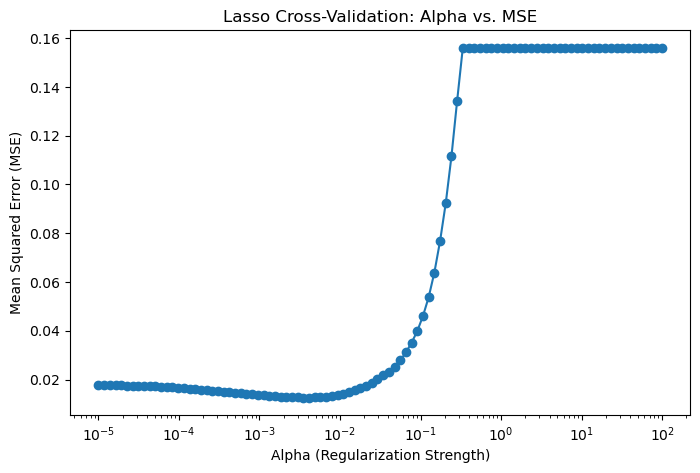

In [66]:
# Plot MSE vs Alpha
plt.figure(figsize=(8, 5))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), marker='o')

plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Alpha (Regularization Strength)")  # X-axis
plt.ylabel("Mean Squared Error (MSE)")  # Y-axis
plt.title("Lasso Cross-Validation: Alpha vs. MSE")  # Title

plt.show()

## Ridge Regression

In [67]:
# Define candidate values for alpha
alphas = np.logspace(-4, 4, 100)  # Values from 10^(-4) to 10^4

# Perform Ridge Regression with cross-validation
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train_log)

# Best alpha found
best_alpha = ridge_cv.alpha_
print(f"Best alpha: {best_alpha}")

# Train final Ridge model with best alpha
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train_log)

# Predict on test set
y_pred = np.exp(ridge_model.predict(X_test_scaled))

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print result
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Best alpha: 291.5053062825182
Mean Absolute Error (MAE): 13418.44
Mean Squared Error (MSE): 408404609.92
Root Mean Squared Error (RMSE): 20209.02
R² Score: 0.9345


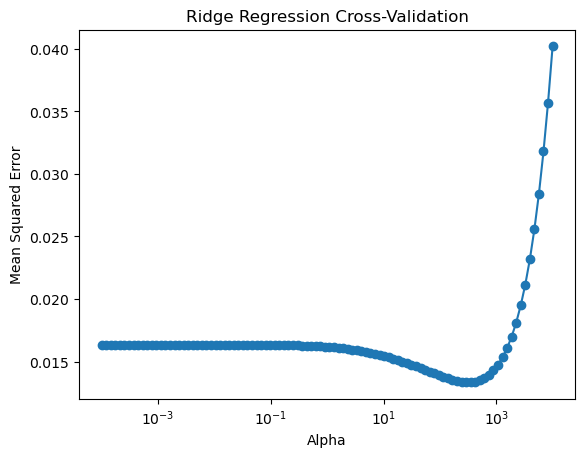

In [68]:
# Plot the cross-validation scores for different alphas
plt.plot(alphas, ridge_cv.cv_values_.mean(axis=0), marker='o')
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("Ridge Regression Cross-Validation")
plt.show()

## Elastic Net Regression

In [69]:
# # Define alpha and l1_ratio ranges
# alphas = np.logspace(-4, 4, 100)  # Alpha values from 10^(-4) to 10^4
# l1_ratios = np.linspace(0.1, 0.9, 10)  # l1_ratio from 0.1 (mostly Ridge) to 0.9 (mostly Lasso)

# # Perform Elastic Net with cross-validation
# elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)
# elastic_cv.fit(X_train_scaled, y_train_log)

# # Best hyperparameters found
# best_alpha = elastic_cv.alpha_
# best_l1_ratio = elastic_cv.l1_ratio_
# print(f"Best alpha: {best_alpha}")
# print(f"Best l1_ratio: {best_l1_ratio}")

best_alpha = 0.0041320124001153384
best_l1_ratio = 0.9

# Train final Elastic Net model with best parameters
elastic_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_model.fit(X_train_scaled, y_train_log)

# Predict on test set
y_pred = np.exp(elastic_model.predict(X_test_scaled))

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print result
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 13180.34
Mean Squared Error (MSE): 363753503.70
Root Mean Squared Error (RMSE): 19072.32
R² Score: 0.9417


## Support Vector Regression

In [70]:
# # Perform Grid Search for hyperparameter tuning
# # Define the parameter grid
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
#     'C': [0.1, 1, 10],  # Regularization parameter
#     'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
#     'epsilon': [0.01, 0.1, 0.5]  # Epsilon in the epsilon-SVR model
# }

# # Initialize the SVR model
# svr = SVR()

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(
#     estimator=svr,
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='r2',
#     n_jobs=-1  # Use all available CPU cores
# )
# grid_search.fit(X_train_scaled, y_train_log)

# # Print the best parameters
# print("Best Parameters:", grid_search.best_params_)

# Train the final model with the best parameters
Best_params = {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
best_svr = SVR(**Best_params)
best_svr.fit(X_train_scaled, y_train_log)

SVR(C=10, epsilon=0.5, kernel='linear')

In [71]:
# Predict on the test set
y_pred = np.exp(best_svr.predict(X_test_scaled))

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 26012.94
Mean Squared Error (MSE): 1730373241.35
Root Mean Squared Error (RMSE): 41597.76
R² Score: 0.7225


## Random Forest Regression

In [72]:
rf = RandomForestRegressor(random_state=42)

# # Define the parameter grid
# param_dist = {
#     'n_estimators': randint(50, 300),  # Number of trees in the forest
#     'max_depth': [10, 20, 30, None],  # Tree depth (None means unlimited)
#     'min_samples_split': [2, 5, 10],  # Min samples to split a node
#     'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
#     'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
# }

# # Randomized Search
# random_search = RandomizedSearchCV(
#     rf, param_distributions=param_dist, 
#     n_iter=20,  # Number of different combinations to try
#     cv=5,  # 5-fold cross-validation
#     scoring='neg_mean_squared_error',  # Use MSE as evaluation metric
#     n_jobs=-1,  # Use all CPU cores
#     verbose=2, 
#     random_state=42
# )

# # Fit the search to your training data
# random_search.fit(X_train, y_train)

# # Best parameters found
# print("Best Hyperparameters:", random_search.best_params_)

Best_params = {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 213}

# Train the best model
best_rf = RandomForestRegressor(**Best_params)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=None, min_samples_leaf=2,
                      n_estimators=213)

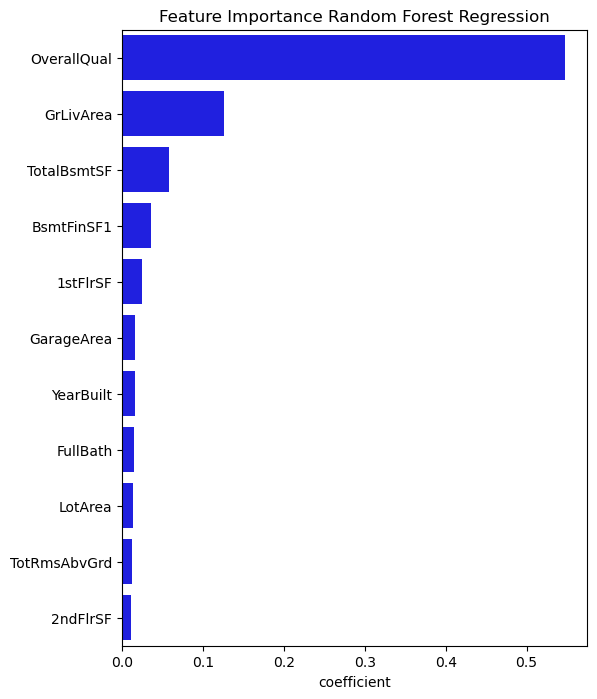

In [74]:
# check feature importance

features_importance = pd.DataFrame({
    'feature': best_rf.feature_names_in_,    # get feature
    'coefficient': best_rf.feature_importances_            # get coefficient
})

features_importance['coefficient'] = abs(features_importance['coefficient'])  
features_importance = features_importance.sort_values(by='coefficient', ascending=False).reset_index(drop=True)


top_10 = features_importance.loc[:10,:]   # get top ten
plt.figure(figsize=(6,8))
sns.barplot(x= top_10['coefficient'], y= top_10['feature'], color='blue')
plt.title('Feature Importance Random Forest Regression')
plt.ylabel('')
plt.show()

In [75]:
# Predict on the test set
y_pred = best_rf.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 15299.36
Mean Squared Error (MSE): 508648749.06
Root Mean Squared Error (RMSE): 22553.24
R² Score: 0.9184


## Decision Tree

In [76]:
# # Hyperparameter grid
# param_grid = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize DecisionTreeRegressor
# dt = DecisionTreeRegressor(random_state=42)

# # Grid Search
# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='r2')
# grid_search.fit(X_train, y_train)

# print("Best Hyperparameters from Grid Search:", Best_params)

# Best parameters
Best_params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
best_dt = DecisionTreeRegressor(**Best_params)
best_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [77]:
# Predictions with best model
y_pred = best_dt.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 23342.40
Mean Squared Error (MSE): 1130940125.18
Root Mean Squared Error (RMSE): 33629.45
R² Score: 0.8186


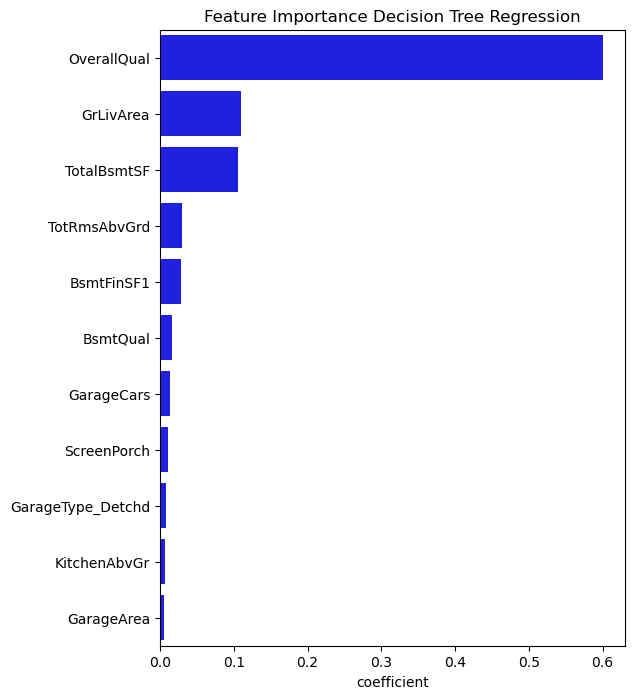

In [78]:
# check feature importance

features_importance = pd.DataFrame({
    'feature': best_dt.feature_names_in_,    # get feature
    'coefficient': best_dt.feature_importances_            # get coefficient
})

features_importance['coefficient'] = abs(features_importance['coefficient'])  
features_importance = features_importance.sort_values(by='coefficient', ascending=False).reset_index(drop=True)


top_10 = features_importance.loc[:10,:]   # get top ten
plt.figure(figsize=(6,8))
sns.barplot(x= top_10['coefficient'], y= top_10['feature'], color='blue')
plt.title('Feature Importance Decision Tree Regression')
plt.ylabel('')
plt.show()

## Gradient Boosting

In [79]:
# hyperparameter tunning
# param_grid = {
#     'n_estimators': [100, 200, 500],       # Number of boosting stages
#     'learning_rate': [0.01, 0.05, 0.1],    # Learning rate
#     'max_depth': [3, 4, 5],                # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],         # Minimum samples required at a leaf node
#     'subsample': [0.8, 0.9, 1.0],          # Subsample ratio of the training instances
#     'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for splits
# }

# # Initialize the Gradient Boosting model
# gb_model = GradientBoostingRegressor(random_state=42)

# # Set up Grid Search with cross-validation
# grid_search = GridSearchCV(
#     estimator=gb_model,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',  # Use negative MSE for scoring
#     cv=5,                              # 5-fold cross-validation
#     n_jobs=-1,                         # Use all available CPU cores
#     verbose=1                          # Print progress
# )

# # Perform Grid Search
# grid_search.fit(X_train, y_train_log)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print(f'Best Hyperparameters: {best_params}')

# # gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
# # gb_model.fit(X_train, y_train)

# gb_model = grid_search.best_estimator_

best_params = {'n_estimators': 5500,
                  'max_depth':5,
                   'min_samples_leaf':14,
                   'learning_rate':0.006328507206504974, 
                   'subsample':0.9170443266552768,
                   'max_features':'sqrt', 
                   'random_state':1}

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor(**best_params)
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred = gb_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 13138.47
Mean Squared Error (MSE): 380252433.58
Root Mean Squared Error (RMSE): 19500.06
R² Score: 0.9390


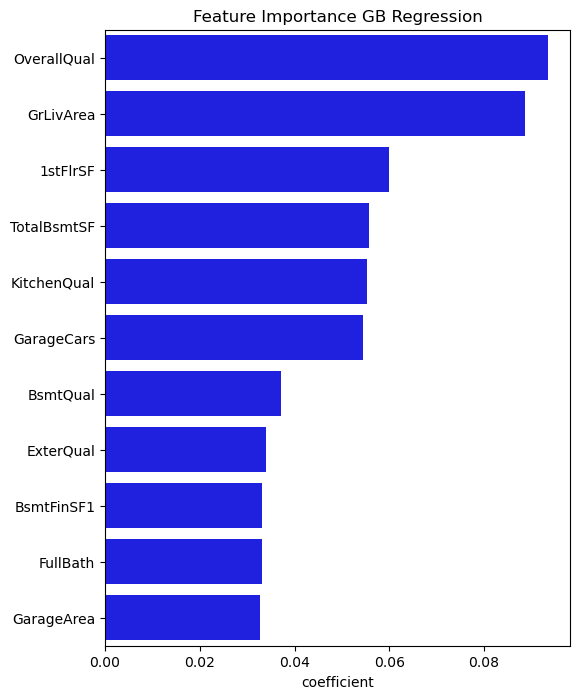

In [80]:
# check feature importance

features_importance = pd.DataFrame({
    'feature': gb_model.feature_names_in_,    # get feature
    'coefficient': gb_model.feature_importances_            # get coefficient
})

features_importance['coefficient'] = abs(features_importance['coefficient'])  
features_importance = features_importance.sort_values(by='coefficient', ascending=False).reset_index(drop=True)


top_10 = features_importance.loc[:10,:]   # get top ten
plt.figure(figsize=(6,8))
sns.barplot(x= top_10['coefficient'], y= top_10['feature'], color='blue')
plt.title('Feature Importance GB Regression')
plt.ylabel('')
plt.show()

## XG Boosting

In [81]:
Best_params = {'n_estimators' : 6500,
              'alpha' :  1.7938525031017074e-09,
              'subsample' : 0.3231512729662032,
              'colsample_bytree' : 0.25528017285233484,
              'max_depth' : 5, 
              'min_child_weight' : 2, 
              'learning_rate' : 0.004828231865923587, 
              'gamma' : 0.0026151163125498213,
              'random_state' : 1}

xgb_model = XGBRegressor(**Best_params)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 12214.07
Mean Squared Error (MSE): 341907280.53
Root Mean Squared Error (RMSE): 18490.73
R² Score: 0.9452


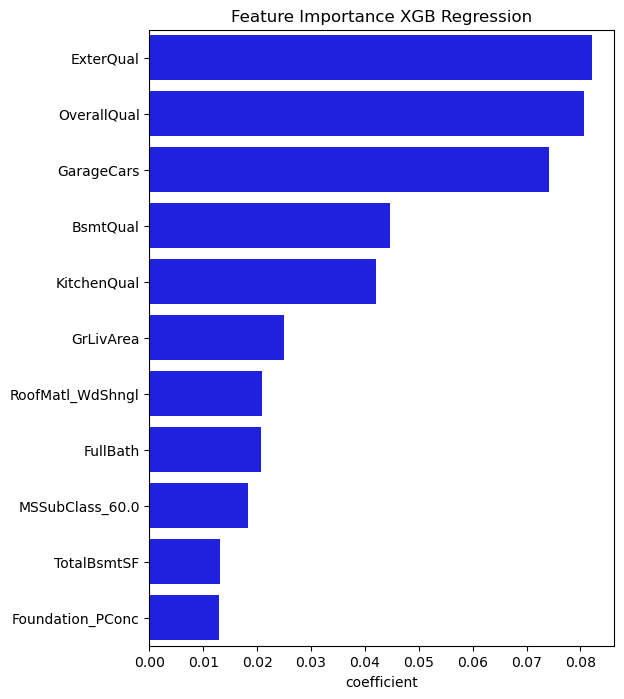

In [82]:
# check feature importance

features_importance = pd.DataFrame({
    'feature': xgb_model.feature_names_in_,    # get feature
    'coefficient': xgb_model.feature_importances_            # get coefficient
})

features_importance['coefficient'] = abs(features_importance['coefficient'])  
features_importance = features_importance.sort_values(by='coefficient', ascending=False).reset_index(drop=True)


top_10 = features_importance.loc[:10,:]   # get top ten
plt.figure(figsize=(6,8))
sns.barplot(x= top_10['coefficient'], y= top_10['feature'], color='blue')
plt.ylabel('')
plt.title('Feature Importance XGB Regression')
plt.show()

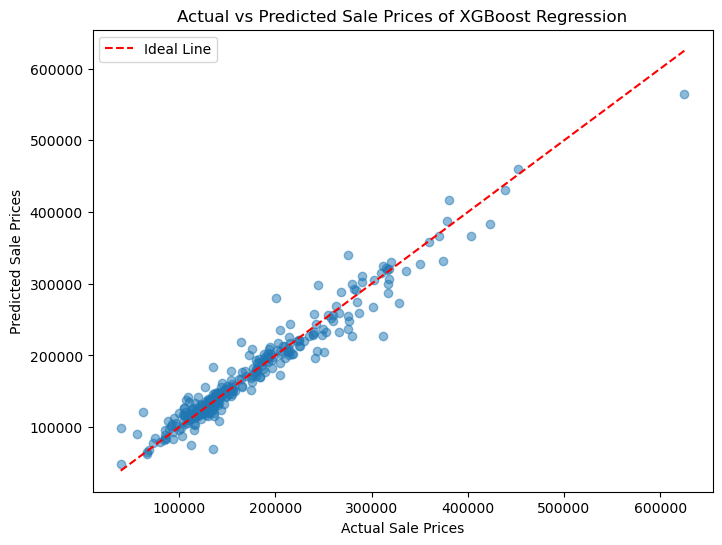

In [83]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Sale Prices of XGBoost Regression')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')

# Plot the ideal line (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.legend()
plt.show()

## Test Dataset Preparation for Kaggle Submission

In [84]:
testData = pd.read_csv("test.csv", sep=",",encoding="UTF-8")

In [85]:
test_ids = testData['Id']
test_data = testData.drop(columns=['Id'])

test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [86]:
# Check for missing values
missing_values = test_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values:\n", missing_values)

Missing Values:
 MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [87]:
test_data['Alley'].fillna('None', inplace=True)
test_data['MasVnrType'].fillna('None', inplace=True)
test_data['FireplaceQu'].fillna('None', inplace=True)
test_data['PoolQC'].fillna('None', inplace=True)
test_data['Fence'].fillna('None', inplace=True)
test_data['MiscFeature'].fillna('None', inplace=True)
test_data['BsmtQual'].fillna('None', inplace=True)
test_data['BsmtCond'].fillna('None', inplace=True)
test_data['BsmtExposure'].fillna('None', inplace=True)
test_data['BsmtFinType1'].fillna('None', inplace=True)
test_data['BsmtFinType2'].fillna('None', inplace=True)
test_data['GarageType'].fillna('None', inplace=True)
test_data['GarageFinish'].fillna('None', inplace=True)
test_data['GarageQual'].fillna('None', inplace=True)
test_data['GarageCond'].fillna('None', inplace=True)

In [88]:
# Check for missing values
missing_values = test_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values:\n", missing_values)

Missing Values:
 MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64


In [89]:
columns = [col for col in columns if col != 'SalePrice']

test_data = test_data[columns]

In [90]:
# Check for missing values
missing_values = test_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values:\n", missing_values)

Missing Values:
 MSZoning          4
GarageYrBlt      78
Functional        2
Exterior2nd       1
BsmtUnfSF         1
BsmtFinSF1        1
GarageArea        1
BsmtFullBath      2
MasVnrArea       15
BsmtFinSF2        1
KitchenQual       1
TotalBsmtSF       1
LotFrontage     227
Utilities         2
GarageCars        1
BsmtHalfBath      2
Exterior1st       1
SaleType          1
dtype: int64


In [91]:
#Fill numerical variabls gaps

# Identify numerical columns
numerical_cols = test_data.select_dtypes(include=['int64', 'float64']).columns

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors

# Apply KNN imputation to numerical columns
test_data.loc[:, numerical_cols] = knn_imputer.fit_transform(test_data[numerical_cols])

In [92]:
# Identify categorical columns
categorical_cols = test_data.select_dtypes(include=['object']).columns

# Function to fill missing values while preserving original distribution
def random_categorical_impute(col):
    if col.isnull().sum() > 0:  # Only apply if there are missing values
        values, counts = np.unique(col.dropna(), return_counts=True)  # Get unique values & counts
        probabilities = counts / counts.sum()  # Compute probabilities
        missing_indices = col[col.isnull()].index  # Get missing indices
        test_data.loc[missing_indices, col.name] = np.random.choice(values, size=len(missing_indices), p=probabilities)

# Apply function to each categorical column
test_data[categorical_cols].apply(random_categorical_impute)

# Verify missing values are handled
print(test_data.isnull().sum().sum())  # Should print 0 if all missing values are filled

0


In [93]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Define categorical variables to be Label Encoded
variables_1 = ['Street', 'CentralAir']

# Apply LabelEncoder to each categorical column
for col in variables_1:
    le = LabelEncoder()
    if test_data[col].isnull().sum() > 0:
        test_data[col] = test_data[col].fillna('Missing')  # Fill NaN if needed
    test_data.loc[:, col] = le.fit_transform(test_data[col])

# Define and apply OrdinalEncoders

# LotShape
ordinal_encoding_1 = OrdinalEncoder(categories=[['Reg', 'IR1', 'IR2', 'IR3']], handle_unknown='use_encoded_value', unknown_value=-1)
test_data.loc[:, 'LotShape'] = ordinal_encoding_1.fit_transform(test_data[['LotShape']])

# Utilities
ordinal_encoding_2 = OrdinalEncoder(categories=[['ELO', 'NoSeWa', 'NoSewr', 'AllPub']], handle_unknown='use_encoded_value', unknown_value=-1)
test_data.loc[:, 'Utilities'] = ordinal_encoding_2.fit_transform(test_data[['Utilities']])

# LandSlope
ordinal_encoding_3 = OrdinalEncoder(categories=[['Gtl', 'Mod', 'Sev']], handle_unknown='use_encoded_value', unknown_value=-1)
test_data.loc[:, 'LandSlope'] = ordinal_encoding_3.fit_transform(test_data[['LandSlope']])

# ExterQual, ExterCond, HeatingQC, KitchenQual
ordinal_encoding_4 = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']], handle_unknown='use_encoded_value', unknown_value=-1)
for col in ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']:
    test_data.loc[:, col] = ordinal_encoding_4.fit_transform(test_data[[col]])

# BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond
ordinal_encoding_5 = OrdinalEncoder(categories=[['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']], handle_unknown='use_encoded_value', unknown_value=-1)
for col in ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']:
    test_data.loc[:, col] = ordinal_encoding_5.fit_transform(test_data[[col]])

# BsmtFinType1, BsmtFinType2
ordinal_encoding_6 = OrdinalEncoder(categories=[['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']], handle_unknown='use_encoded_value', unknown_value=-1)
for col in ['BsmtFinType1', 'BsmtFinType2']:
    test_data.loc[:, col] = ordinal_encoding_6.fit_transform(test_data[[col]])

# Functional
ordinal_encoding_7 = OrdinalEncoder(categories=[['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']], handle_unknown='use_encoded_value', unknown_value=-1)
test_data.loc[:, 'Functional'] = ordinal_encoding_7.fit_transform(test_data[['Functional']])

# GarageFinish
ordinal_encoding_8 = OrdinalEncoder(categories=[['None', 'Unf', 'RFn', 'Fin']], handle_unknown='use_encoded_value', unknown_value=-1)
test_data.loc[:, 'GarageFinish'] = ordinal_encoding_8.fit_transform(test_data[['GarageFinish']])

# PavedDrive
ordinal_encoding_9 = OrdinalEncoder(categories=[['N', 'P', 'Y']], handle_unknown='use_encoded_value', unknown_value=-1)
test_data.loc[:, 'PavedDrive'] = ordinal_encoding_9.fit_transform(test_data[['PavedDrive']])

# PoolQC
ordinal_encoding_10 = OrdinalEncoder(categories=[['None', 'Fa', 'TA', 'Gd', 'Ex']], handle_unknown='use_encoded_value', unknown_value=-1)
test_data.loc[:, 'PoolQC'] = ordinal_encoding_10.fit_transform(test_data[['PoolQC']])

# BsmtExposure
ordinal_encoding_11 = OrdinalEncoder(categories=[['None', 'No', 'Mn', 'Av', 'Gd']], handle_unknown='use_encoded_value', unknown_value=-1)
test_data.loc[:, 'BsmtExposure'] = ordinal_encoding_11.fit_transform(test_data[['BsmtExposure']])


In [94]:
test_data = pd.get_dummies(test_data, columns=OneHotEncoding, drop_first=False)

In [95]:
num_columns = test_data.shape[1]
num_columns

250

In [96]:
missing_columns = list(set(data_work.columns) - set(test_data.columns))

missing_columns = [col for col in missing_columns if col != 'SalePrice']

missing_columns

['Condition2_RRAe',
 'Exterior2nd_Other',
 'Condition2_RRNn',
 'Exterior1st_ImStucc',
 'MiscFeature_TenC',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_Membran',
 'RoofMatl_Roll',
 'Electrical_Mix',
 'RoofMatl_Metal',
 'Condition2_RRAn',
 'Heating_Floor',
 'Exterior1st_Stone']

In [97]:
# Add missing columns with 0 values in all rows
for col in missing_columns:
    test_data[col] = 0  # Add column with 0s

num_columns = test_data.shape[1]
num_columns

264

In [98]:
missing_columns = list(set(test_data.columns) - set(data_work.columns))
missing_columns

['MSSubClass_150.0']

In [99]:
test_data.drop(columns=missing_columns, inplace=True)

In [100]:
test_data.shape

(1459, 263)

In [101]:
train_columns = [col for col in data_work.columns if col != 'SalePrice']
test_data = test_data[train_columns]

In [102]:
duplicates = test_data.columns[test_data.columns.duplicated()].tolist()
print("Duplicate Columns:", duplicates)
len(duplicates)

Duplicate Columns: ['RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing']


23

In [103]:
test_data = test_data.loc[:, ~test_data.columns.duplicated()]
print("Fixed test_data shape:", test_data.shape)

Fixed test_data shape: (1459, 240)


In [104]:
test_data_lr = test_data.drop(columns=feature_to_remove)

In [105]:
test_data_scaled = scaler.transform(test_data)

In [106]:
# predictions = np.exp(best_svr.predict(test_data_scaled)) # if use log transform on SalePrice
predictions = xgb_model.predict(test_data)

submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': predictions
})

submission.to_csv("XGBoost.csv", index=False)

print("Submission file saved as 'submission.csv'. Upload this file to Kaggle.")

Submission file saved as 'submission.csv'. Upload this file to Kaggle.
